In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets, model_selection

data2 = pd.read_csv('ArASL_data.csv', sep = ',')
data2.head(5)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0  jeem     235     234     233     233     232     232     231     231   
1  jeem     220     220     220     220     220     220     220     221   
2  jeem     211     212     214     216     215     215     214     213   
3  jeem      29      29      29      28      28      28      28      28   
4  jeem     236     236     236     236     236     236     236     236   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     230  ...       160       158       156       154       153       152   
1     221  ...       126       121       116       113       110       108   
2     214  ...       187       184       179       177       178       182   
3      28  ...       163       163       179       192       198       201   
4     238  ...       158       158       158       163       167       170   

   pixel781  pixel782  pixel783  pixel784  
0       151       150       149       148  
1       105       104       102       101  
2       188       189       189       187  
3       203       163        45        20  
4       174       179       184       183  

[5 rows x 785 columns]

In [2]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

In [3]:
data = downsample(data2,'label')

In [4]:
n_test = int(data.to_numpy().shape[0]*0.2)
print(n_test)

6425


In [5]:
x_train_p, x_test_p, y_train_p, y_test_p=train_test_split(data.drop(['label'], axis=1), data[['label']], test_size=n_test)

x_train = x_train_p.to_numpy()
x_test = x_test_p.to_numpy()
y_train = y_train_p.to_numpy()
y_train = y_train.reshape(len(y_train))
y_test = y_test_p.to_numpy()
y_test = y_test.reshape(len(y_test))

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(25703, 784) (6425, 784) (25703,) (6425,)


In [45]:
clf = LogisticRegression(solver='newton-cg',
                         multi_class='multinomial',penalty='l2').fit(x_train, y_train)

/Users/loic/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


In [46]:
clf.score(x_train, y_train)

0.9666575886083336

<ipython-input-32-b0521426c837>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  p = plt.figure(figsize=(300, 25));


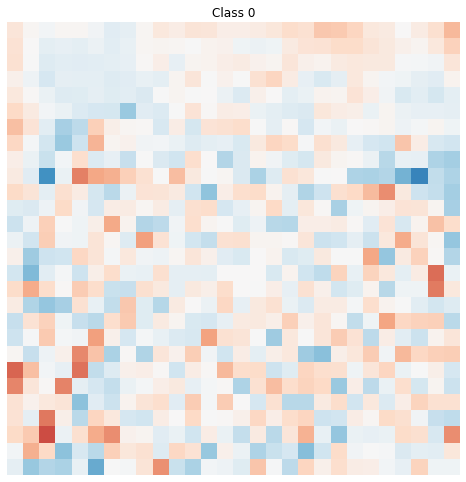

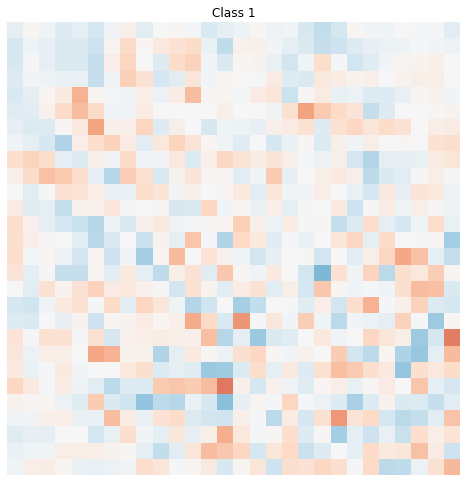

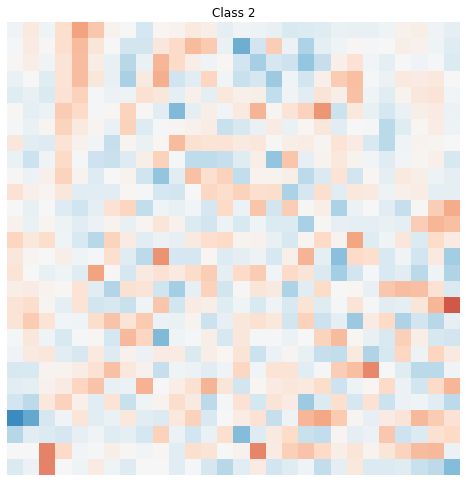

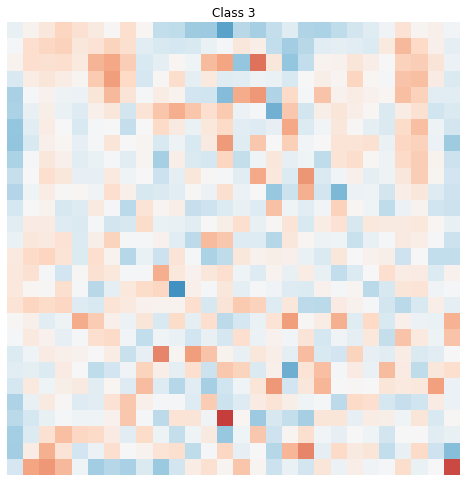

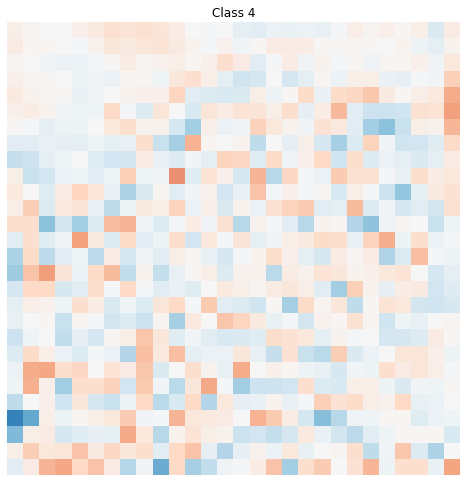

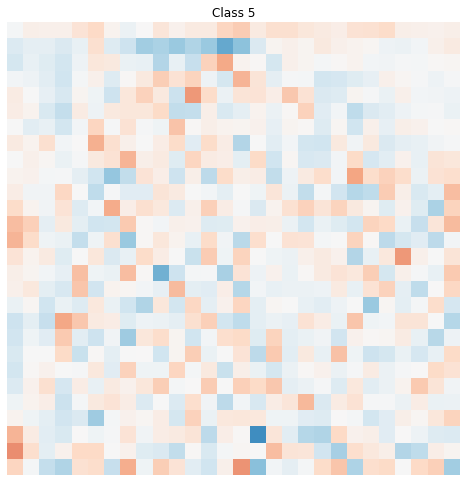

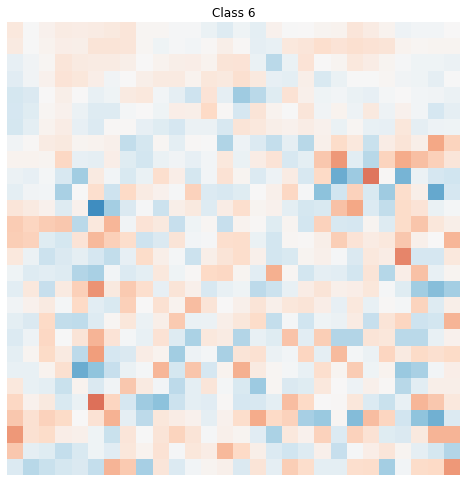

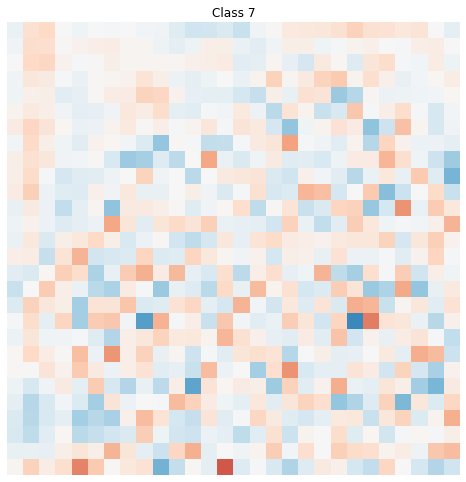

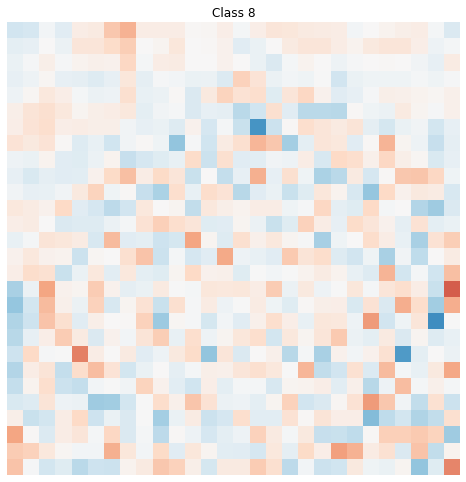

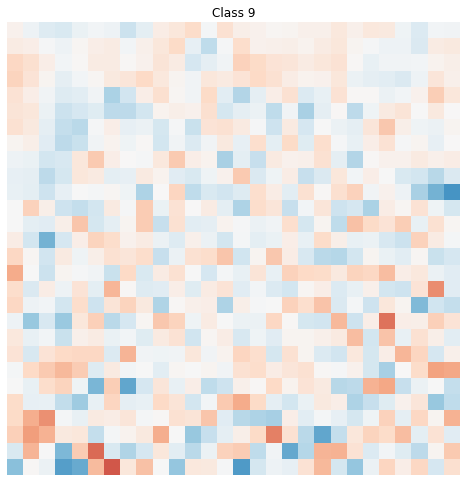

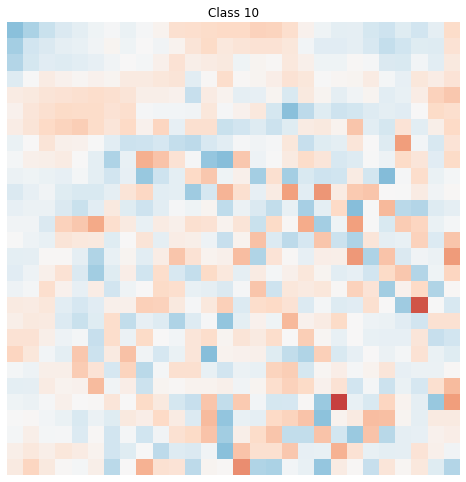

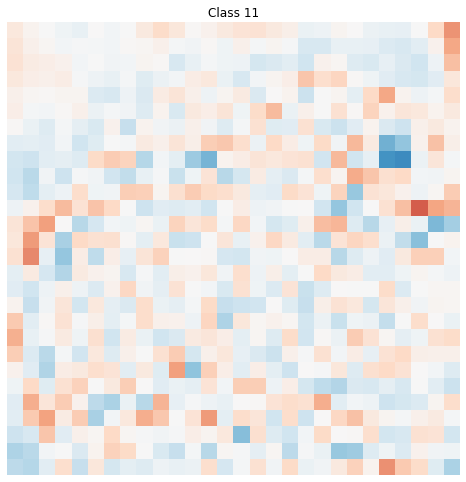

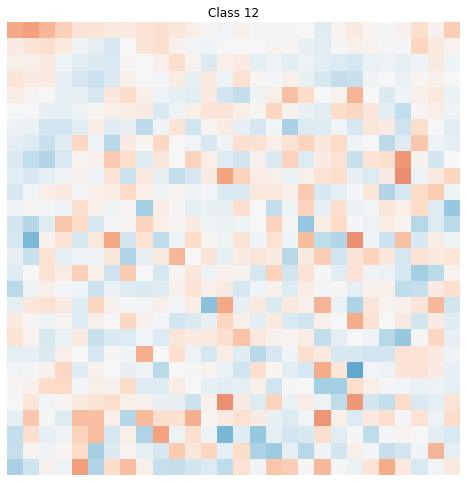

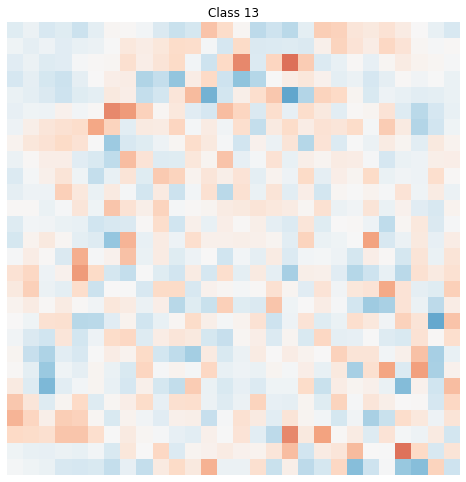

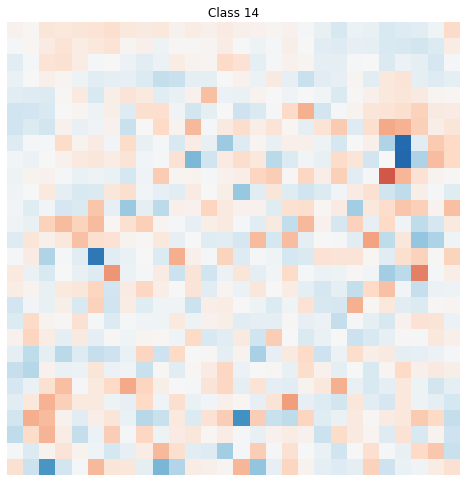

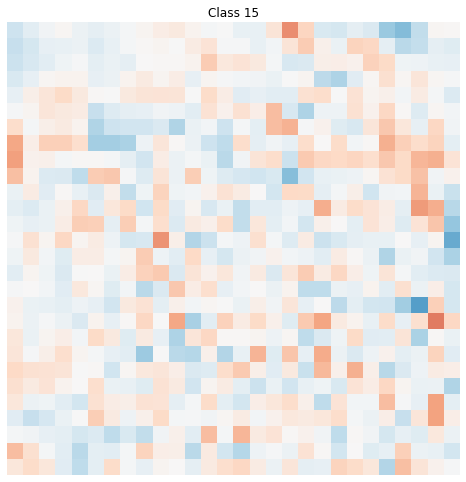

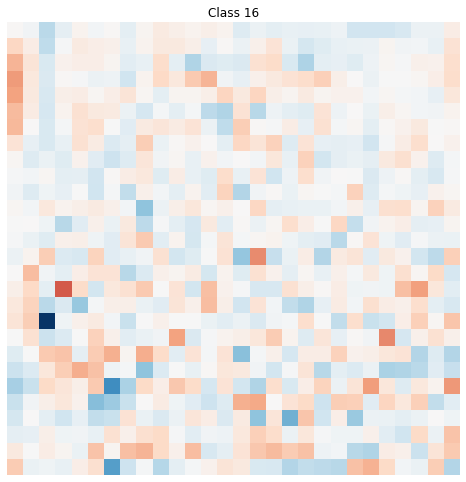

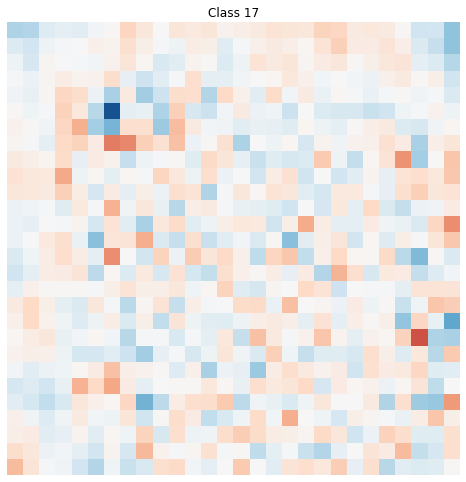

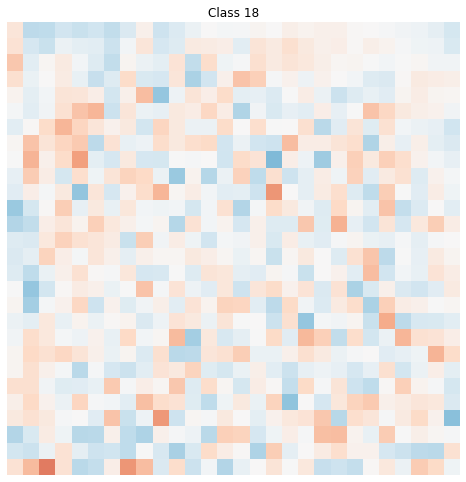

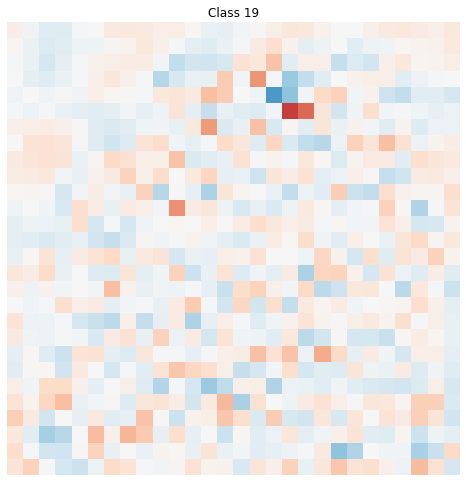

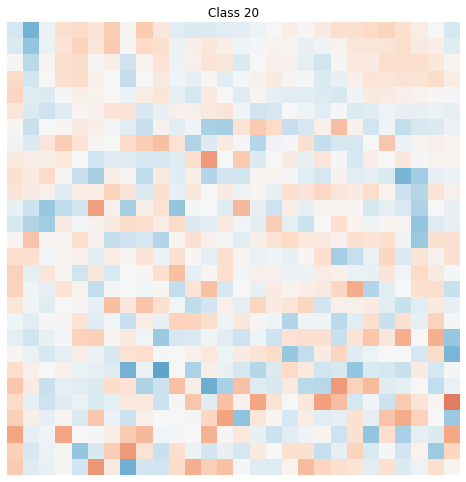

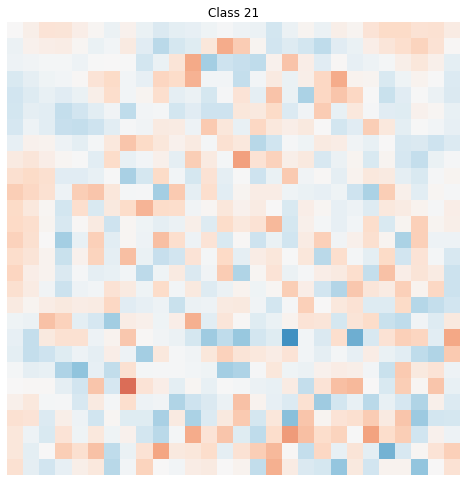

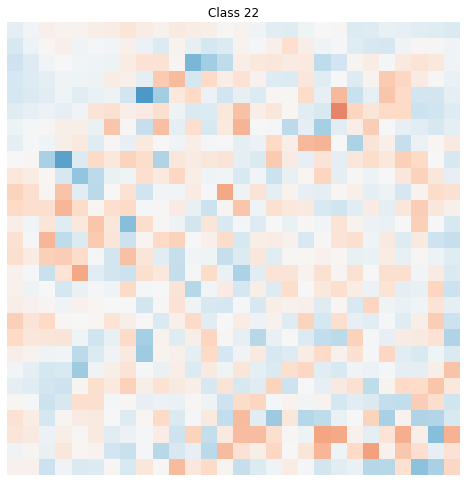

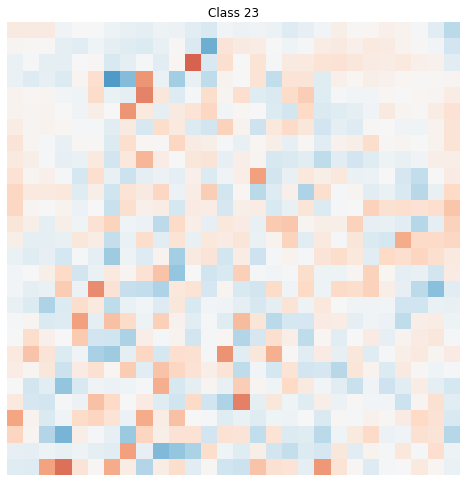

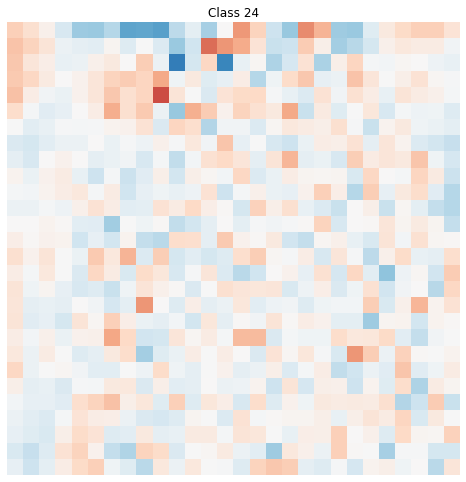

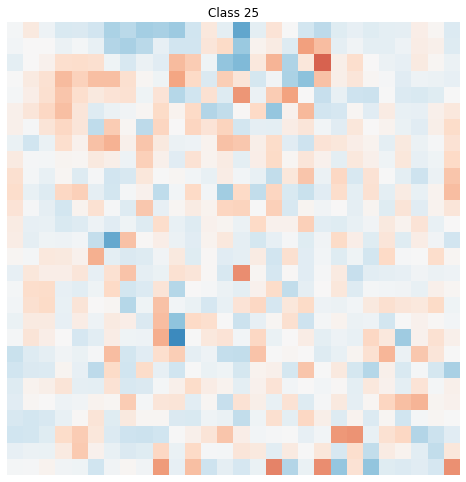

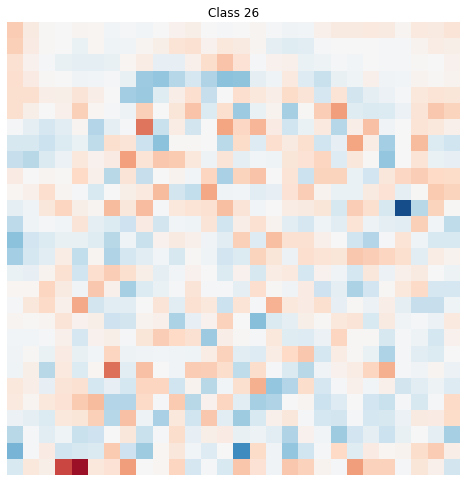

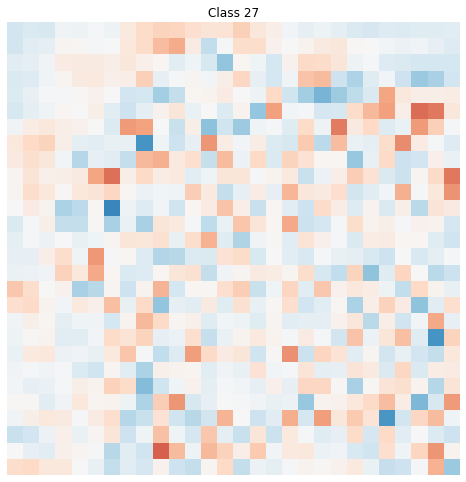

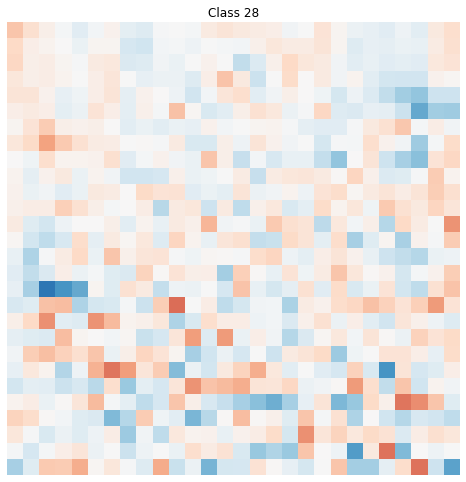

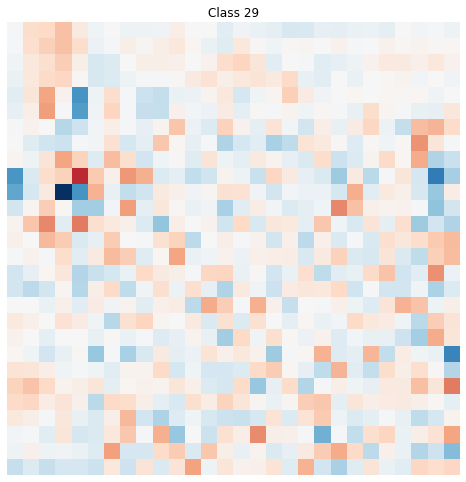

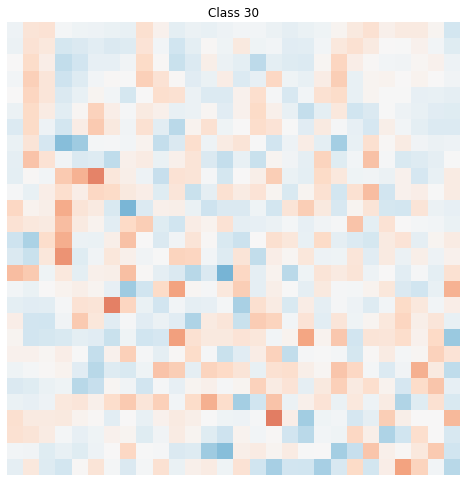

In [32]:
scale = np.max(np.abs(clf.coef_))
nclasses = 31


for i in range(nclasses):
    p = plt.figure(figsize=(300, 25));
    p = plt.subplot(1, nclasses, i + 1)
    p = plt.imshow(clf.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %i' % i);

In [47]:
y_pred = clf.predict(x_test)

In [48]:
accuracy =  np.mean(y_test == y_pred)
print(accuracy)

0.7671595330739299


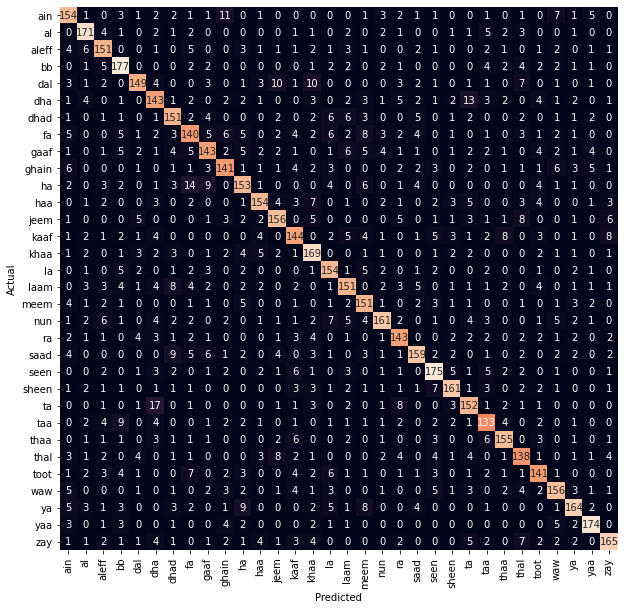

In [39]:
import seaborn as sns
cm = pd.crosstab(y_test, y_pred, 
                               rownames=['Actual'], colnames=['Predicted'])
p = plt.figure(figsize=(10,10));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)

In [24]:
cm = pd.crosstab(y_test, y_pred, 
                               rownames=['Actual'], colnames=['Predicted'], normalize='index')
p = plt.figure(figsize=(15,15));
p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)